# Instructions

* The assignment is due in one week.
* Provide some short comments/documentation for your code. This makes it easier to understand and grade.
* In the cell below, please provide a breakdown of individual contributions. For example, Person XYZ worked on problems 5-10, etc.

*Breakdown of individual contributions: ==FILL IN==*

---

# New York City Restaurant Inspections

We will analyze restaurant inspections in New York City, starting November 1, 2014 and ending January 31, 2015. 
The data is in the file <a href="NYC_Restaurants.csv">NYC_Restaurants.csv</a>.

In [88]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/prestoncook/Desktop/mis-373/venv/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['indices']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [89]:
# The dtype=str tells Pandas to load in all columns as strings.
# I do this because I know they are strings, and Pandas doesn't have to spend time figuring out the column dtypes.
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)
df

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44628,44628,50019095,EARLY,BROOKLYN,967,MANHATTAN AVE,11222,9177577831,Sandwiches/Salads/Mixed Buffet,01/29/2015,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection
44629,44629,50019107,TESHIGOTOYA,MANHATTAN,432,E 13TH ST,10009,2127773174,Japanese,01/30/2015,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Re-inspection
44630,44630,50019107,TESHIGOTOYA,MANHATTAN,432,E 13TH ST,10009,2127773174,Japanese,01/28/2015,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,35,NaN,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection
44631,44631,50019107,TESHIGOTOYA,MANHATTAN,432,E 13TH ST,10009,2127773174,Japanese,01/28/2015,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,35,NaN,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection


#### [Q1, 7 points] Create a unique name for each restaurant.
On the DataFrame created above, add a new column to your DataFrame called 'RESTAURANT', that combines DBA, BUILDING, STREET, ZIPCODE, and BORO fields. For example:
<pre>WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN</pre>

Print the first 10 values of the RESTAURANT column of your DataFrame.

In [90]:
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO']
df['RESTAURANT'][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

#### [Q2, 7 points] How many restaurants are included in the data?
Careful now:

*  A *Subway* in one particular address (i.e., building, street, zipcode, and boro) counts as one restaurant; don't combine all Subways into one restaurant!
* The data can have multiple violations for the same restaurant!

In [91]:
num_restaurants = df['RESTAURANT'].drop_duplicates().count()

#### [Q3, 7 points] How many chains are there?
Let us define a chain to be the same restaurant name occurring in at least two different (building, street, zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations).

You'll see multiple versions of the name "DUNKIN DONUTS". Just act as if they are different chains.

In [92]:
temp = df[['DBA', 'RESTAURANT']].drop_duplicates()['DBA'].value_counts()
mask = temp > 1
num_chains = temp[mask].count()
num_chains

368

#### [Q4, 7 points] Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem. Count the number of restaurants for each chain as a measure of its popularity.

<Axes: xlabel='DBA'>

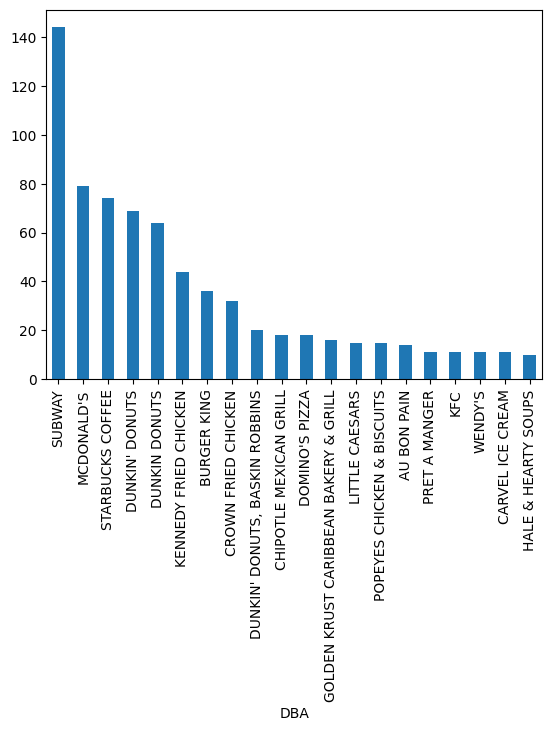

In [93]:
top_20 = temp[mask][:20].plot(kind='bar')
top_20

#### [Q5, 7 points] What fraction of all restaurants are chain restaurants?

You should think of a restaurant as being one restaurant at one location.
So *Wendy's 5th Street* and *Wendy's on 10th Street* are two different restaurants.
Essentially a restaurant is what you defined in Q1.

In [ ]:
fraction = num_chains / num_restaurants
fraction

#### [Q6, 7 points] Plot the number of non-chain restaurants in each boro.

We need several steps:
* Figure out all the non-chain restaurants.
* Then elect out only those restaurants.
* Finally plot the number of such restaurants by boro. 
* Make sure to look at the plot; we don't want to see... oh... the *missing* boro.

In [ ]:
non_chain_restaurant_names = temp[temp == 1].index.values
restaurants = df.iloc[df['RESTAURANT'].drop_duplicates().index.values]
non_chains_full: DataFrame = restaurants[restaurants['DBA'].isin(temp[temp == 1].index.values)]
non_chains_full['BORO'].value_counts()[:5].plot.bar()

#### [Q7, 10 points] Plot the *fraction* of non-chain restaurants in each boro.
The boro with the most non-chain restaurants might just be the boro
with the most restaurants in general.

If we want to find the boro that attracts the most "independent" restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.

Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?

In [ ]:
restaurants: DataFrame = df.iloc[df['RESTAURANT'].drop_duplicates().index.values]
num_restaurants_in_boro = restaurants.groupby(['BORO']).size()
num_non_chains = non_chains_full['BORO'].value_counts()[:5]
indices = num_non_chains.index.values

ratio: Series = num_non_chains.loc[indices] / num_restaurants_in_boro.loc[indices]
ratio.sort_values(ascending=False).plot.bar()

# No


#### [Q8, 7 points] Plot the popularity of cuisines.
Which cuisines are the most well-represented among all restaurants?

* Define the popularity of a cuisine as the number of restaurants serving that cuisine.
* Plot the popularity of the top 20 cuisines.

<Axes: xlabel='CUISINE DESCRIPTION'>

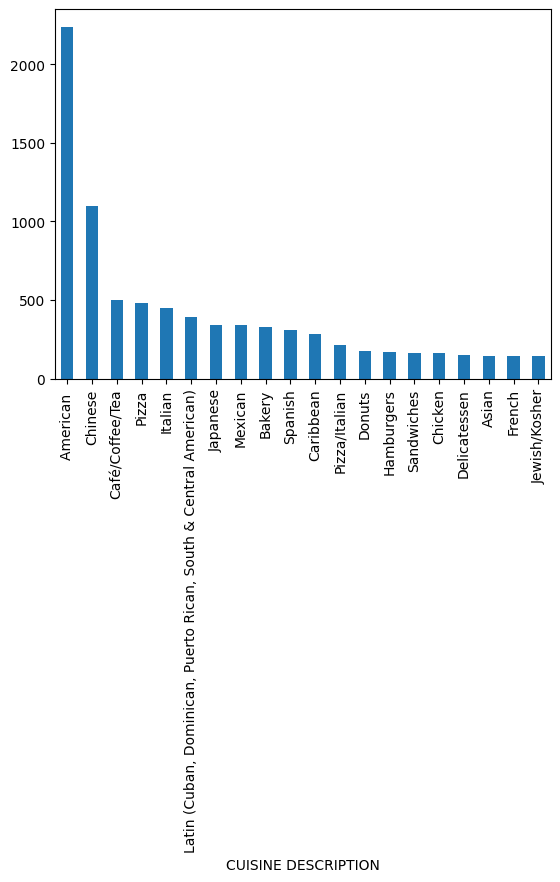

In [96]:
top_20_cuisines = df[['CUISINE DESCRIPTION', 'RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
top_20_cuisines[:20].plot(kind='bar')

#### [Q9, 12 points] Plot the cuisines among restaurants which do not get cited for violations.
Ideally, you should explore and see what happens when there is no
violation, but here I will just tell you: the 'VIOLATION CODE' field
is missing.

* Select only the *RESTAURANT* and *CUISINE DESCRIPTION* columns of the DataFrame (we created the *RESTAURANT* column in an earlier question).
* Select the instances where a restaurant did not get cited.
* If a restaurant-cuisine combination was inspected but not cited multiple times, retain only one instance of it.
* Among these instances, how frequent is each of the cuisines?
* Plot the frequencies of the top-20 among these cuisines.

<Axes: xlabel='CUISINE DESCRIPTION'>

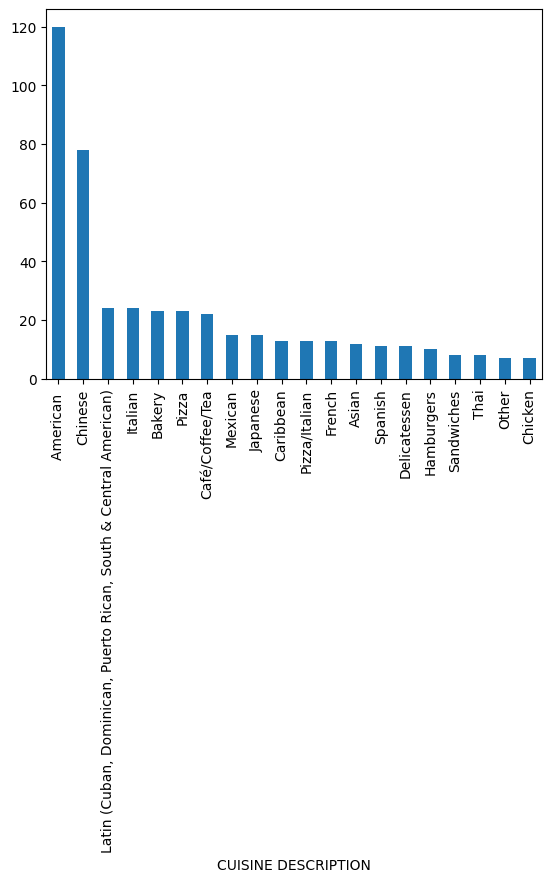

In [94]:
clean_cuisines = df[df['VIOLATION CODE'].isna()][['RESTAURANT', 'CUISINE DESCRIPTION']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
clean_cuisines[:20].plot.bar()

#### [Q10, 7 points] What cuisines tend to be the "cleanest"?

* Select all cuisines for which there were at least 20 restaurants representing that cuisine.
* For each such cuisine, compute the ratio of the counts in Q9 to Q8. This is the ratio of restaurants with at least one non-citation, versus total number of restaurants, for each cuisine.
* Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are "most likely to be clean."

In [97]:
tmp = df[['CUISINE DESCRIPTION', 'RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
tmp = tmp[tmp >= 20]
tmp['ratio'] = clean_cuisines / top_20_cuisines
tmp['ratio'] = tmp['ratio'].fillna(0)
tmp['ratio'].sort_values(ascending = False)[:10]

CUISINE DESCRIPTION
Afghan                           0.333333
Creole                           0.181818
Chinese/Cuban                    0.181818
Bangladeshi                      0.150000
Russian                          0.111111
Peruvian                         0.107143
Barbecue                         0.095238
Soups & Sandwiches               0.095238
Continental                      0.095238
Vietnamese/Cambodian/Malaysia    0.093750
Name: count, dtype: float64

#### [Q11, 10 points] What are the most common violations in each  borough?

* Create a table of the number of times each violation description was observed in each borough.
    * To create the table, check out the `crosstab` function. We will see a more general version of this when we discuss `groupby` in class.
    * Alternatively, you can create a dummy column, fill it with just the number 1, and use `pivot_table` (figure out what *aggfunc* should be).
* Figure out the most common violation description for each borough.

In [99]:
crosstab = pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO'])
crosstab

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,0,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,0,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,1,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,0,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,0,92,16
...,...,...,...,...,...,...
Toilet facility not provided for employees or for patrons when required.,2,3,11,0,3,1
Toilet facility used by women does not have at least one covered garbage receptacle.,1,5,7,0,2,1
"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",2,8,15,0,20,3


#### [Q12,12 points] What are the most common violations per borough, *after normalizing for the relative abundance of each violation?*

Hopefully, the answer to the previous question left you unsatisfied,
because some violations are just very common, irrespective of borough.
A better approach would be to **normalize** the violation counts, as
follows.

* **Get overall frequencies:** Figure out how common each violation is, over the entire dataset; let's call this <tt>violationFrequency</tt>.
* **Normalize:** Consider the table of number of violations by borough that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for that type; i.e., divide the series of violations by <tt>violationFrequency</tt>. We want to do this **for each borough**.
* **Find the biggest violations:** After this normalization, for each borough, figure out the most common violation description.